In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sns.set(style='ticks', context='notebook', rc={'figure.figsize':(7, 5)})

In [2]:
from sklearn.datasets import *

data = load_wine()
d = pd.DataFrame(data=data.data, columns=data.feature_names)
d['class'] = load_wine(True)[1]

# Build a classification task using 3 informative features
cols = [c for c in d.columns if c != 'class']
X = d[cols]
y = d['class']

d.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
markers = {0: "s", 1: "o", 2: "X"}
palette = sns.color_palette(n_colors=len(np.unique(y)))

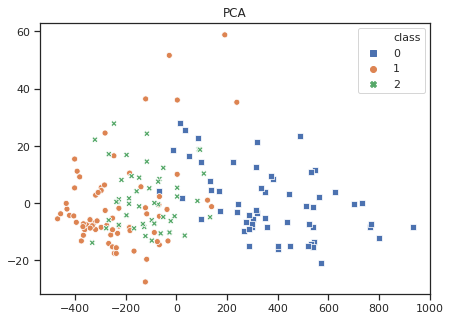

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_t = pca.fit_transform(X)

sns.scatterplot(X_t[:,0], X_t[:,1], hue=y, style=y, markers=markers, palette=palette)
plt.title('PCA')
plt.show()

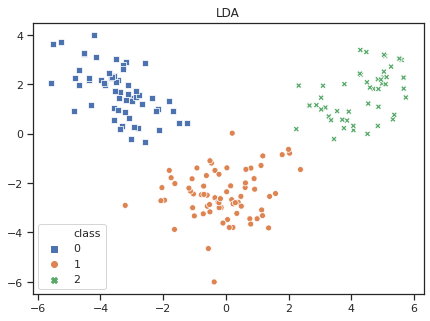

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(n_components=2)
X_t = clf.fit_transform(X, y)

sns.scatterplot(X_t[:,0], X_t[:,1], hue=y, style=y, markers=markers, palette=palette)
plt.title('LDA')
plt.show()

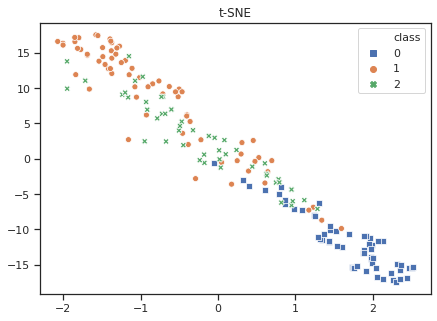

In [6]:
from sklearn.manifold import TSNE

clf = TSNE(n_components=2, perplexity=30, learning_rate=15, random_state=1)
X_t = clf.fit_transform(X)

sns.scatterplot(X_t[:,0], X_t[:,1], hue=y, style=y, markers=markers, palette=palette)
plt.title('t-SNE')
plt.show()

In [9]:
import sys
!{sys.executable} -m pip install umap-learn==0.4.1

/home/ckoerner/.local/share/virtualenvs/Chapter_1_-_Building_an_End-To-End_Machine-c1gFhttr/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9002. The TBB threading layer is disabled.
  warnings.warn(problem)


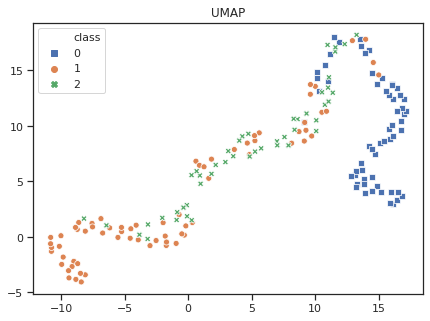

In [8]:
import umap.umap_ as umap

np.random.seed(2)
reducer = umap.UMAP(n_neighbors=10, min_dist=1, n_components=2)
X_t = reducer.fit_transform(X)

sns.scatterplot(X_t[:,0], X_t[:,1], hue=y, style=y, markers=markers, palette=palette)
plt.title('UMAP')
plt.show()